In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [7]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
directory  = '/content/drive/MyDrive/dataset_project/data_k_mean.txt'
train = pd.read_csv(directory, sep=' ' , header = None)
train1 = train.to_numpy()
print(train1)

[[-7.87157 -4.86573]
 [-4.76661 -6.87944]
 [-6.67986 -5.8308 ]
 ...
 [ 6.91832 -0.32132]
 [-8.23828 -4.00405]
 [-5.75112 -5.99531]]


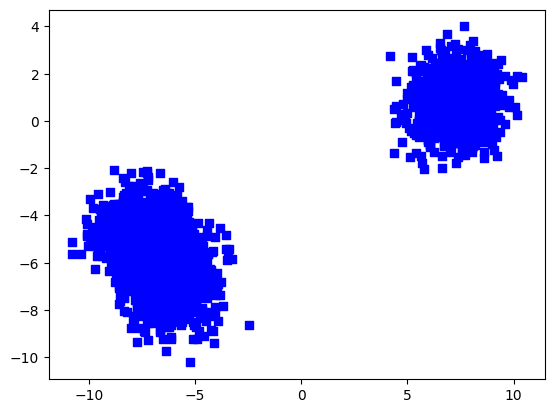

In [9]:
plt.scatter(train[0], train[1], c = 'blue', marker = 's')
plt.show()

In [10]:
k = int(input("Enter the value of k : "))

Enter the value of k : 2


In [11]:
np.random.seed(seed=72)
random_numbers = np.random.randint(low=0, high=len(train1), size=(k))
centroids = [train1[random_numbers[i]] for i in range(k)]
print(centroids)

[array([ 6.80375, -0.13017]), array([6.68468, 0.85224])]


In [12]:
distance = []
index_clusters = [-1 for i in range(len(train1))]
count = 0
clusters = {}
for x in range(500):
    count = x

    flag = 0
    for y in range(k):
        clusters[y] = []
    # iterate through each data points
    for i in range(len(train1)):
        distance = []
        for j in range(k):
            dist = np.sqrt(pow(abs((train1[i][0] - centroids[j][0])), 2) + pow(abs((train1[i][1] - centroids[j][1])), 2))
            distance.append(dist)
        index = distance.index(min(distance))

        if index_clusters[i] != index:
            flag = 1
            index_clusters[i] = index
        clusters[index].append(train1[i])

    if flag == 0:
        break

    centroids = [np.mean(np.asarray(clusters[z]), axis=0) for z in range(k)]

In [13]:
x1 = np.asarray(clusters[0])[:, 0]
y1 = np.asarray(clusters[0])[:, 1]

x2 = np.asarray(clusters[1])[:, 0]
y2 = np.asarray(clusters[1])[:, 1]

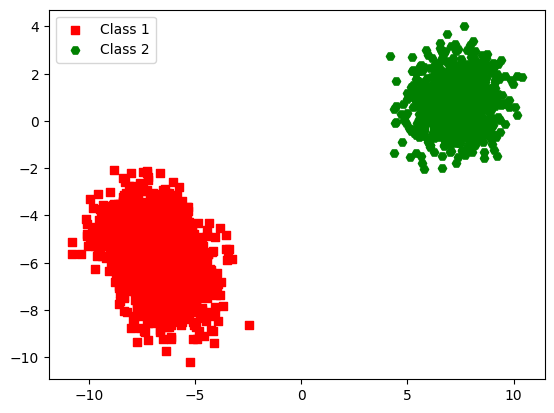

In [14]:
plt.scatter(x1, y1, c = 'red', marker = 's', label = 'Class 1')
plt.scatter(x2, y2, c = 'green', marker = 'H', label = 'Class 2')
plt.legend(loc = 'best')
plt.show()